<a href="https://colab.research.google.com/github/Angelica-ca/mineria-de-datos/blob/main/Taller_mineria_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import f_oneway, chi2_contingency

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/social media content and misinformation data (2).csv')
df

,Platform,Content_Type,Post_ID,Timestamp,User_Followers,Content_Text,Language,Country,Engagement_Score,Like_Count,...,Fact_Check_Source,Sentiment_Score,Toxicity_Score,Political_Leaning,Topic_Tags,Content_Length_Chars,Media_Type,Has_External_Link,Viral_Score,Moderation_Action
0,Twitter,Tweet,tw_001,2024-08-13T09:15:23Z,15420,Climate change is just a natural cycle - the E...,English,United States,0.72,234,...,Reuters,0.23,0.15,Conservative,climate;science;environment,97,Text,False,0.68,Warning_Label
1,Facebook,Post,fb_002,2024-08-13T11:32:45Z,8934,New vaccine study shows 99% effectiveness agai...,English,United Kingdom,0.89,567,...,NHS,0.78,0.05,Neutral,vaccine;health;covid,78,Text,True,0.85,Approved
2,Instagram,Story,ig_003,2024-08-13T14:21:12Z,234567,Just got my booster shot! Feeling protected an...,English,Canada,0.94,1234,...,NaN,0.91,0.02,Liberal,vaccine;health;personal,89,Image,False,0.45,Approved
3,YouTube,Video,yt_004,2024-08-13T16:45:33Z,567890,Documentary: The Real Truth About Election Sec...,English,United States,0.45,2345,...,AP_News,-0.12,0.67,Conservative,election;politics;security,45,Video,True,0.78,Demonetized
4,TikTok,Video,tk_005,2024-08-13T18:22:11Z,123456,5G towers cause health problems - here's the p...,English,Australia,0.34,890,...,WHO,-0.45,0.78,Conspiracy,5G;health;conspiracy,67,Video,True,0.56,Removed
5,LinkedIn,Post,ln_006,2024-08-13T10:12:44Z,5678,Excited to announce our new AI research breakt...,English,Germany,0.87,456,...,NaN,0.89,0.01,Neutral,AI;healthcare;research,156,Text,True,0.34,Approved
6,Reddit,Post,rd_007,2024-08-13T20:33:17Z,234,The moonlanding was definitely fake - here's w...,English,United States,0.23,45,...,NASA,-0.67,0.45,Conspiracy,moon;space;conspiracy,234,Text,False,0.29,Downvoted
7,Twitter,Tweet,tw_008,2024-08-13T07:45:22Z,89234,Breaking: New renewable energy breakthrough co...,English,Japan,0.91,1567,...,Nature_Journal,0.84,0.03,Liberal,renewable;energy;solar,134,Text,True,0.91,Promoted
8,Facebook,Post,fb_009,2024-08-13T13:17:55Z,12345,Masks don't work against viruses - government ...,English,Brazil,0.12,67,...,CDC,-0.78,0.89,Conservative,masks;government;conspiracy,89,Text,False,0.67,Restricted
9,Instagram,Post,ig_010,2024-08-13T15:44:28Z,45678,Beautiful day at the climate protest! Every vo...,English,Sweden,0.93,789,...,NaN,0.87,0.02,Liberal,climate;protest;environment,78,Image,False,0.43,Approved


In [ ]:
df.describe()

,User_Followers,Engagement_Score,Like_Count,Share_Count,Comment_Count,Sentiment_Score,Toxicity_Score,Content_Length_Chars,Viral_Score
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,177132.900000,0.643500,1572.425000,364.675000,329.350000,0.352500,0.279750,127.700000,0.61425
std,199374.861798,0.311568,1701.807921,451.666509,275.906204,0.642662,0.330861,102.048556,0.17688
min,234.000000,0.060000,12.000000,3.000000,45.000000,-0.890000,0.010000,34.000000,0.29000
25%,21447.000000,0.332500,317.250000,83.500000,114.500000,-0.257500,0.027500,78.000000,0.45000
50%,89123.000000,0.820000,839.500000,234.000000,234.000000,0.765000,0.055000,89.000000,0.63000
75%,234814.250000,0.882500,2345.000000,456.000000,456.000000,0.852500,0.655000,147.750000,0.73000
max,678901.000000,0.950000,6789.000000,2345.000000,1234.000000,0.920000,0.940000,567.000000,0.92000


In [ ]:
resumen = df.groupby(["Platform", "Content_Type"])["User_Followers"].agg(["mean", "median", "max", "count"]).reset_index()
print(resumen)


     Platform Content_Type       mean    median     max  count
0    Facebook         Live   89456.00   89456.0   89456      1
1    Facebook         Post   17053.25   12356.0   34567      4
2    Facebook        Video   78901.00   78901.0   78901      1
3   Instagram         Post   84784.00   84784.0  123890      2
4   Instagram         Reel  140178.00  140178.0  156789      2
5   Instagram        Story  156400.50  156400.5  234567      2
6    LinkedIn      Article   67890.00   67890.0   67890      1
7    LinkedIn         Post  157706.00   29011.5  567123      4
8      Reddit      Comment    1234.00    1234.0    1234      1
9      Reddit         Post    5095.25    5623.0    8901      4
10     TikTok        Dance  567234.00  567234.0  567234      1
11     TikTok        Video  187064.75  106234.0  456890      4
12    Twitter       Thread  234561.00  234561.0  234561      1
13    Twitter        Tweet  271783.50  162011.5  678901      6
14    YouTube        Short  234567.00  234567.0  234567

In [ ]:
#verificacion de duplicados y revision de nulos
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

print(df.isna().mean().sort_values(ascending=False).head(10))

Duplicados: 0
Fact_Check_Source    0.325
Content_Type         0.000
Post_ID              0.000
Timestamp            0.000
User_Followers       0.000
Content_Text         0.000
Language             0.000
Country              0.000
Platform             0.000
Engagement_Score     0.000
dtype: float64


In [ ]:
# Separar variables numericas y categoricas
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# remplaza los valores nulos por la mediana y por la moda
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
for col in num_cols:
    df[col+"_z"] = (df[col] - df[col].mean()) / df[col].std()

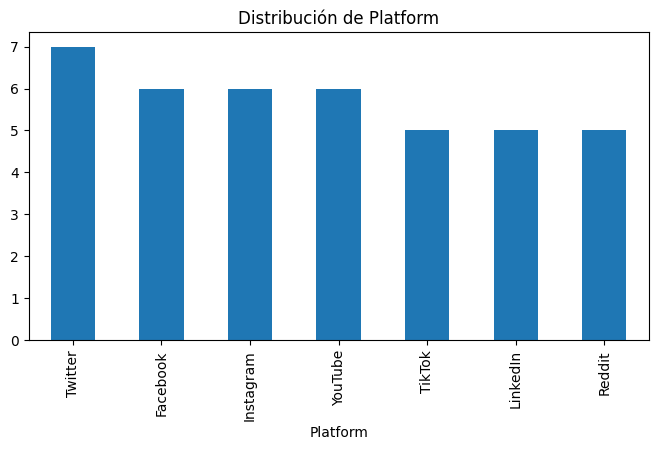

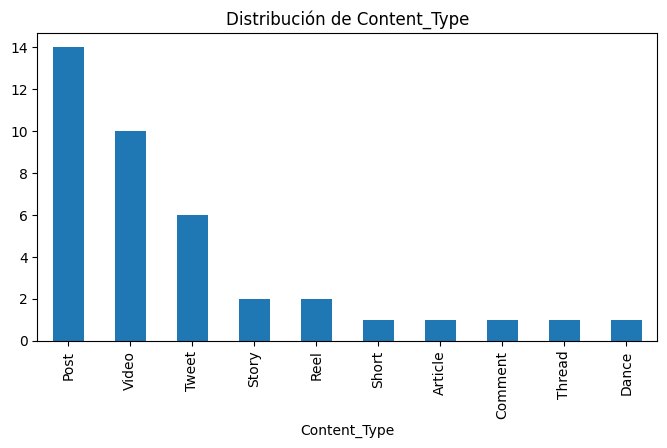

In [ ]:
# Frecuencia de categorías principales
for col in ["Platform", "Content_Type"]:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Distribución de {col}")
    plt.show()


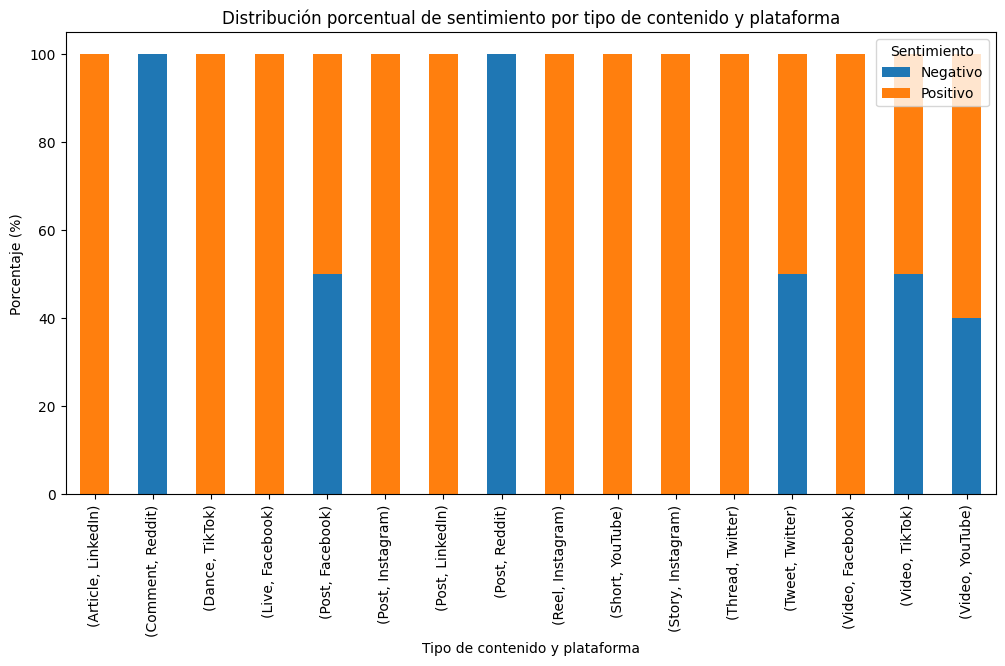

In [ ]:
df["sentiment_cat"] = pd.cut(
    df["Sentiment_Score"],
    bins=[-1, -0.05, 0.05, 1],
    labels=["Negativo", "Neutral", "Positivo"]
)

tabla = pd.crosstab(
    [df["Content_Type"], df["Platform"]],
    df["sentiment_cat"],
    normalize="index"
) * 100

tabla.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Distribución porcentual de sentimiento por tipo de contenido y plataforma")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Tipo de contenido y plataforma")
plt.legend(title="Sentimiento")
plt.show()


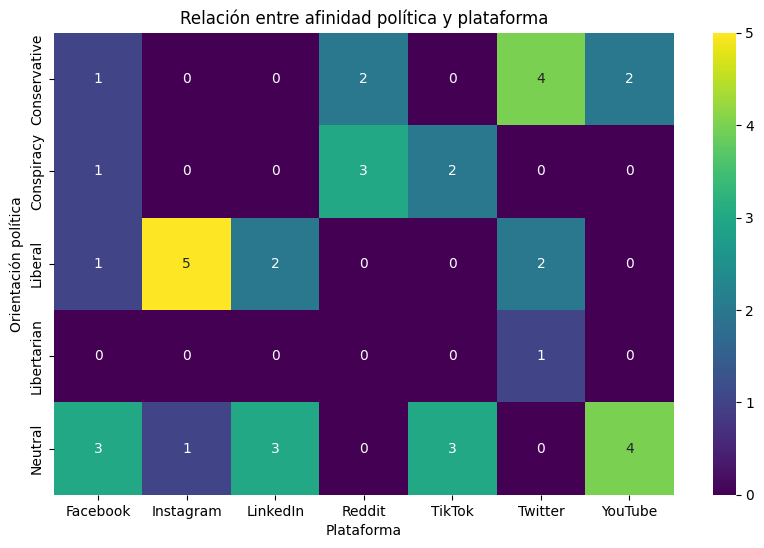

In [ ]:
import seaborn as sns

df_crosstab = pd.crosstab(df["Political_Leaning"], df["Platform"])

plt.figure(figsize=(10,6))
sns.heatmap(df_crosstab, cmap="viridis", annot=True, fmt="d")
plt.xlabel("Plataforma")
plt.ylabel("Orientación política")
plt.title("Relación entre afinidad política y plataforma")
plt.show()

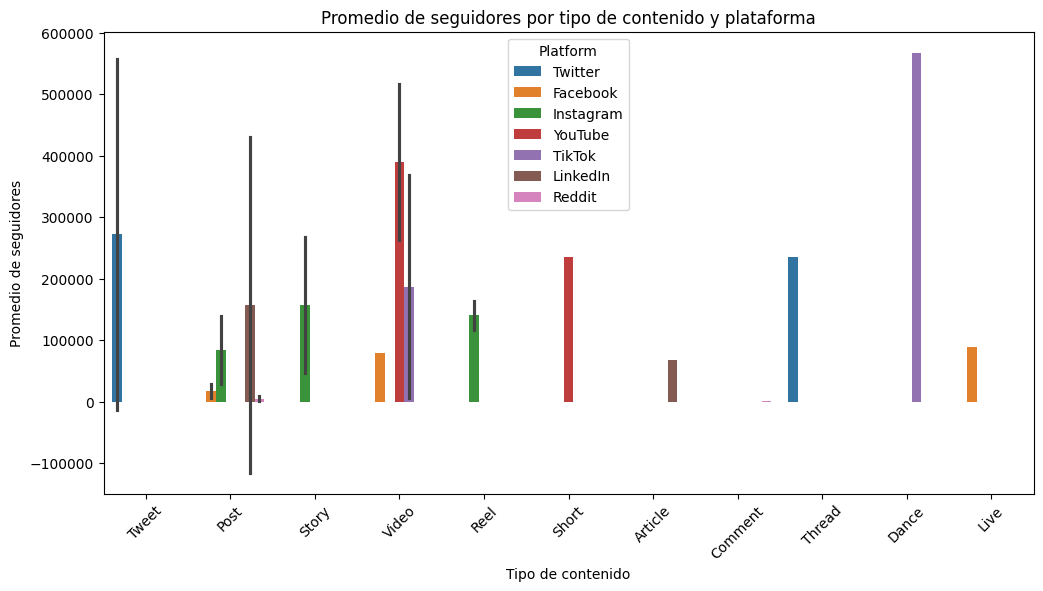

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Content_Type", y="User_Followers", hue="Platform", errorbar="sd")
plt.title("Promedio de seguidores por tipo de contenido y plataforma")
plt.xlabel("Tipo de contenido")
plt.ylabel("Promedio de seguidores")
plt.xticks(rotation=45)
plt.show()


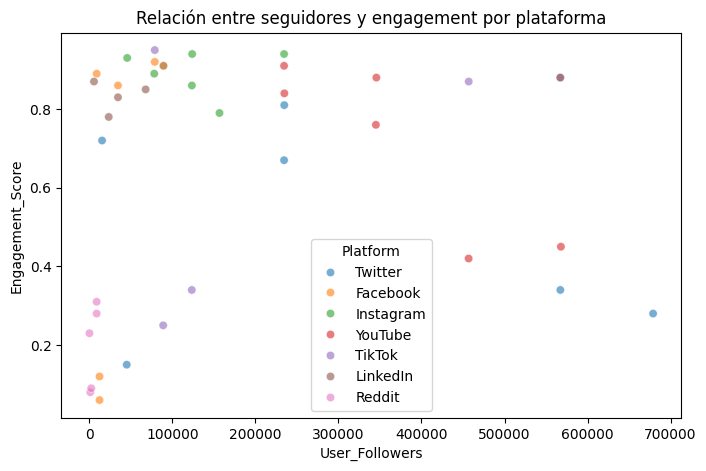

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="User_Followers", y="Engagement_Score", hue="Platform", alpha=0.6)
plt.title("Relación entre seguidores y engagement por plataforma")
plt.show()

In [ ]:
#cantidad de seguidores respecto al contenido que se publica
df[["Platform", "Content_Type", "User_Followers"]]

,Platform,Content_Type,User_Followers
0,Twitter,Tweet,15420
1,Facebook,Post,8934
2,Instagram,Story,234567
3,YouTube,Video,567890
4,TikTok,Video,123456
5,LinkedIn,Post,5678
6,Reddit,Post,234
7,Twitter,Tweet,89234
8,Facebook,Post,12345
9,Instagram,Post,45678


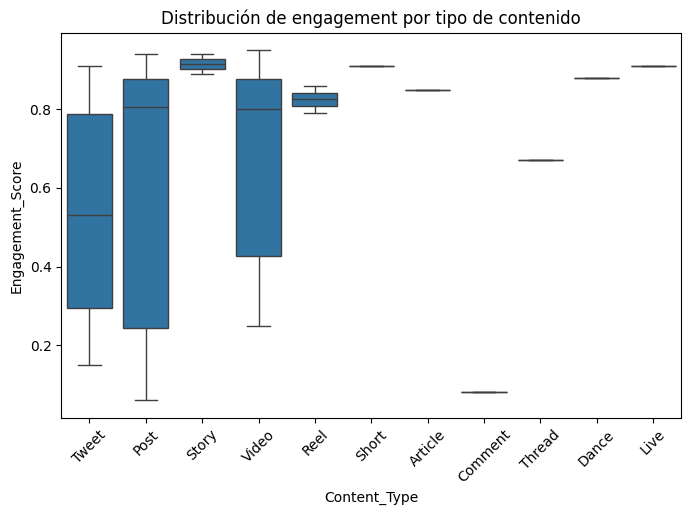

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Content_Type", y="Engagement_Score")
plt.title("Distribución de engagement por tipo de contenido")
plt.xticks(rotation=45)
plt.show()


In [ ]:
groups = [df.loc[df["Content_Type"]==c, "User_Followers"] for c in df["Content_Type"].unique()]
anova_result = f_oneway(*groups)
print("ANOVA - p-value seguidores ~ tipo de contenido:", anova_result.pvalue)


ANOVA - p-value seguidores ~ tipo de contenido: 0.15974660230277335


In [ ]:
tabla = pd.crosstab(df["Political_Leaning"], df["Platform"])
chi2, p, dof, expected = chi2_contingency(tabla)
print("Chi2 - p-value relación Political Leaning ~ Platform:", p)


Chi2 - p-value relación Political Leaning ~ Platform: 0.0032915813403368243
